<a href="https://colab.research.google.com/github/cashby-890/ST-554-HW4/blob/main/ST554_Spring2026_HomeworkFour_CodyAshby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST 554 Spring 2026 Homework Four by Cody Ashby**

## ***Summarizing Student Data Graphically***

Before we proceed, let's recall the numerical summaries that were done from the previous assignment (bringing in code from Homework 3):

In [2]:
import numpy as np
import pandas as pd

Here's a fascinating dataset from the UCI machine learning repository:

In [3]:
student_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt",sep=";")

Let's see what the first few observations are...

In [4]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Since there are so many variables, I will use `.columns` to see an expanded list of the variables we are dealing with.

In [5]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## *Analyzing categorical variables*

Before creating any contingency tables, I'll go ahead and rename a few of these categorical variables and the categories associated with them.

In [6]:
student_data["FamilySize"]=student_data.famsize.astype("category")
student_data.FamilySize=student_data.FamilySize.cat.rename_categories(["Greater Than 3","Less Than 3"])
student_data["ParentStatus"]=student_data.Pstatus.astype("category")
student_data.ParentStatus=student_data.ParentStatus.cat.rename_categories(["Apart","Together"])
student_data["Guardian"]=student_data.guardian.astype("category")
student_data.Guardian=student_data.Guardian.cat.rename_categories(["Father","Mother","Someone Else"])
student_data["Area"]=student_data.address.astype("category")
student_data.Area=student_data.Area.cat.rename_categories(["Rural","Urban"])
student_data["School"]=student_data.school.astype("category")
student_data.School=student_data.School.cat.rename_categories(["Gabriel Pereira","Mousinho da Silveira"])
student_data["Sex"]=student_data.sex.astype("category")
student_data.Sex=student_data.Sex.cat.rename_categories(["Female","Male"])

Here is a one-way contingency table showing than an overwhelming majority of the students come from more densely populated areas and likely don't have to travel too far to get to school and have most of everything they need close by.

In [7]:
student_data.Area.value_counts()

,count
Area,
Urban,307
Rural,88


This two-way contingency table incorporates the schools the students go to. Here, a very large majority of students from densely populated areas attend Gabriel Pereira, which indicates that Gabriel Pereira may resemble a city school or could be very affordable.

In [8]:
pd.crosstab(student_data.School,student_data.Area)

Area,Rural,Urban
School,,
Gabriel Pereira,63,286
Mousinho da Silveira,25,21


In this three-way contingency table, we now take gender into consideration. At first glance, there doesn't seem to be a significant difference between male and female students, with the exception of those from urban areas attending Gabriel Pereira. Almost 20 more female students from urban areas attend Gabriel Pereira than do male students.

In [9]:
pd.crosstab([student_data.School,student_data.Area],student_data.Sex)

Sex                         Female  Male
School               Area               
Gabriel Pereira      Rural      31    32
                     Urban     152   134
Mousinho da Silveira Rural      13    12
                     Urban      12     9

Now, we'll create a conditional two-way contingency table by two methods:

* subsetting the data from the original three-way table
* subsetting the data first, and then creating a two-way table from it.

In [10]:
pd.crosstab([student_data.School,student_data.Area],student_data.Sex)["Female"]

School                Area 
Gabriel Pereira       Rural     31
                      Urban    152
Mousinho da Silveira  Rural     13
                      Urban     12
Name: Female, dtype: int64

In [11]:
pd.crosstab([student_data.School,student_data.Area],student_data.Sex).loc[:,"Female"]

School                Area 
Gabriel Pereira       Rural     31
                      Urban    152
Mousinho da Silveira  Rural     13
                      Urban     12
Name: Female, dtype: int64

## *Analyzing numerical variables*

There are a small handful of numerical variables in this dataset. Let's print out some measures of center and spread for them. Here, we'll focus on the age, grade during the first period, and the final grade.

In [12]:
print(student_data.age.mean(),student_data.age.std())
print(student_data.G1.mean(),student_data.G1.std())
print(student_data.G3.mean(),student_data.G3.std())

16.696202531645568 1.2760427246056245
10.90886075949367 3.3191946715076686
10.415189873417722 4.5814426109978434


Next, we'll group each of these measures by school.

In [13]:
student_data.groupby("School").age.mean()

/tmp/ipython-input-219954148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby("School").age.mean()


,age
School,
Gabriel Pereira,16.521490
Mousinho da Silveira,18.021739


In [14]:
student_data.groupby("School").age.std()

/tmp/ipython-input-2030998189.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby("School").age.std()


,age
School,
Gabriel Pereira,1.216610
Mousinho da Silveira,0.881643


In [15]:
student_data.groupby("School").G1.mean()

/tmp/ipython-input-3180445835.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby("School").G1.mean()


,G1
School,
Gabriel Pereira,10.939828
Mousinho da Silveira,10.673913


In [16]:
student_data.groupby("School").G1.std()

/tmp/ipython-input-4087972993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby("School").G1.std()


,G1
School,
Gabriel Pereira,3.319109
Mousinho da Silveira,3.347001


In [17]:
student_data.groupby("School").G3.mean()

/tmp/ipython-input-1161709513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby("School").G3.mean()


,G3
School,
Gabriel Pereira,10.489971
Mousinho da Silveira,9.847826


In [18]:
student_data.groupby("School").G3.std()

/tmp/ipython-input-3927494089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby("School").G3.std()


,G3
School,
Gabriel Pereira,4.625397
Mousinho da Silveira,4.237229


Would the area these students came from make a difference here? Let's see...

In [19]:
student_data.groupby(["School","Area"]).age.mean()

/tmp/ipython-input-4057789152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby(["School","Area"]).age.mean()


School                Area 
Gabriel Pereira       Rural    16.650794
                      Urban    16.493007
Mousinho da Silveira  Rural    18.040000
                      Urban    18.000000
Name: age, dtype: float64

In [20]:
student_data.groupby(["School","Area"]).age.std()

/tmp/ipython-input-3760609129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby(["School","Area"]).age.std()


School                Area 
Gabriel Pereira       Rural    1.193514
                      Urban    1.221857
Mousinho da Silveira  Rural    0.888819
                      Urban    0.894427
Name: age, dtype: float64

In [21]:
student_data.groupby(["School","Area"]).G1.mean()

/tmp/ipython-input-1033300350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby(["School","Area"]).G1.mean()


School                Area 
Gabriel Pereira       Rural    10.682540
                      Urban    10.996503
Mousinho da Silveira  Rural     9.960000
                      Urban    11.523810
Name: G1, dtype: float64

In [22]:
student_data.groupby(["School","Area"]).G1.std()

/tmp/ipython-input-2184519445.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby(["School","Area"]).G1.std()


School                Area 
Gabriel Pereira       Rural    3.477232
                      Urban    3.286867
Mousinho da Silveira  Rural    3.272104
                      Urban    3.310877
Name: G1, dtype: float64

In [23]:
student_data.groupby(["School","Area"]).G3.mean()

/tmp/ipython-input-3393860277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby(["School","Area"]).G3.mean()


School                Area 
Gabriel Pereira       Rural     9.761905
                      Urban    10.650350
Mousinho da Silveira  Rural     8.880000
                      Urban    11.000000
Name: G3, dtype: float64

In [24]:
student_data.groupby(["School","Area"]).G3.std()

/tmp/ipython-input-2053884694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.groupby(["School","Area"]).G3.std()


School                Area 
Gabriel Pereira       Rural    4.595630
                      Urban    4.624509
Mousinho da Silveira  Rural    4.484417
                      Urban    3.701351
Name: G3, dtype: float64

And, last but not least, here's the correlation matrix for the numeric variables.

In [25]:
student_data[["age","absences","G1","G2","G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


### *Representing Student Data Graphically (Task 1)*

We are now going to add a handful of graphs so we can get a visual representation of this data.

First, we'll begin with a stacked bar graph of the two-way contingency table above.

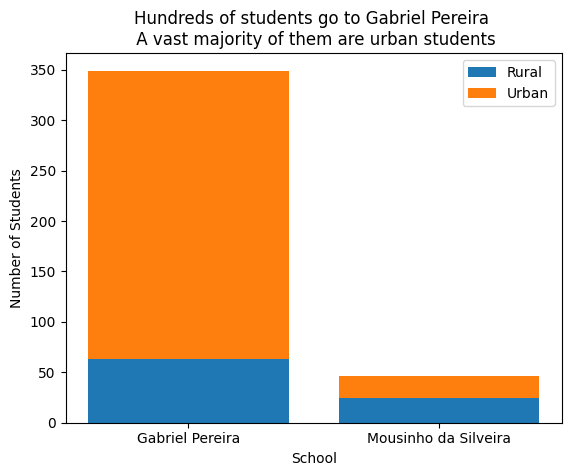

In [26]:
import matplotlib.pyplot as plt
two_way_counts=pd.crosstab(student_data.School,student_data.Area)
plt.bar(x=student_data.School.cat.categories,
    height=two_way_counts.loc[:,"Rural"],
    label="Rural")
plt.bar(x=student_data.School.cat.categories,
        height=two_way_counts.loc[:,"Urban"],
        bottom=two_way_counts.loc[:,"Rural"],
        label="Urban"
        )
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Hundreds of students go to Gabriel Pereira \n A vast majority of them are urban students")
plt.legend(loc=0)

Now, let's try a side-by-side bar graph so it's more aesthetically pleasing and also easier to interpret.

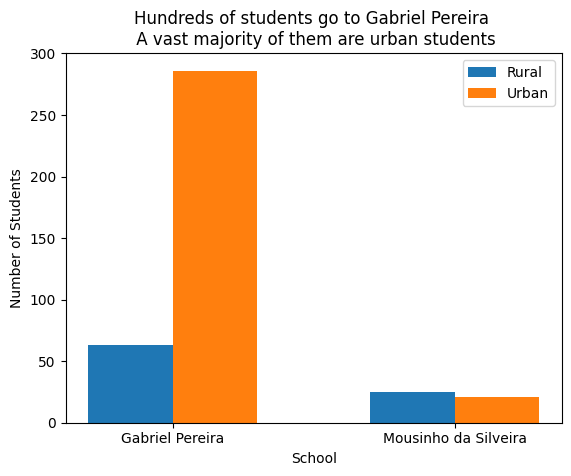

In [27]:
plt.bar(x=[1,2],
    height=two_way_counts.loc[:,"Rural"],
    width=0.3,
    label="Rural")
plt.bar(
    x=[1.3,2.3],
    height=two_way_counts.loc[:,"Urban"],
    width=0.3,
    label="Urban")
plt.xticks([1.15,2.15],student_data.School.cat.categories)
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Hundreds of students go to Gabriel Pereira \n A vast majority of them are urban students")
plt.legend(loc=0)

Graphically summarizing our numerical variables in this case is a little bit more involved, but still quite doable.

/tmp/ipython-input-2576737351.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.hist(column="age",by="Area")


array([<Axes: title={'center': 'Rural'}>,
       <Axes: title={'center': 'Urban'}>], dtype=object)

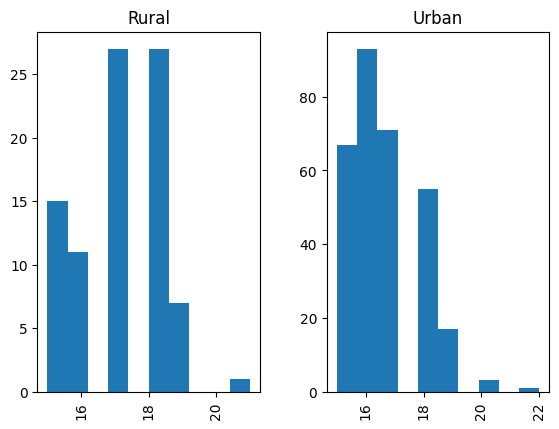

In [28]:
student_data.hist(column="age",by="Area")


/tmp/ipython-input-3826725621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.hist(column="G3",by="Area")


array([<Axes: title={'center': 'Rural'}>,
       <Axes: title={'center': 'Urban'}>], dtype=object)

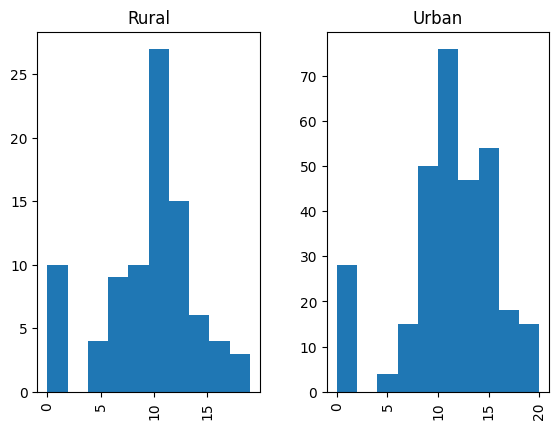

In [29]:
student_data.hist(column="G3",by="Area")

Now, we'll attempt to do a few kernel density plots for each of the histograms above.

Before proceeding, though, we need to subset the data so that we know the students' age  and final grade by area.

In [30]:
Rural_age=student_data.loc[student_data["Area"]=="Rural","age"]
Urban_age=student_data.loc[student_data["Area"]=="Urban","age"]
Rural_final=student_data.loc[student_data["Area"]=="Rural","G3"]
Urban_final=student_data.loc[student_data["Area"]=="Urban","G3"]

Let the kernel density plots commence!

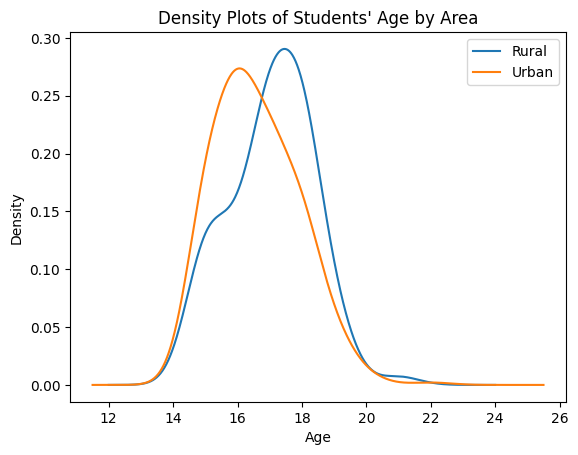

In [31]:
Rural_age.plot.density(bw_method=0.5,label="Rural")
Urban_age.plot.density(bw_method=0.5,label="Urban")
plt.xlabel("Age")
plt.title("Density Plots of Students' Age by Area")
plt.legend(loc=0)

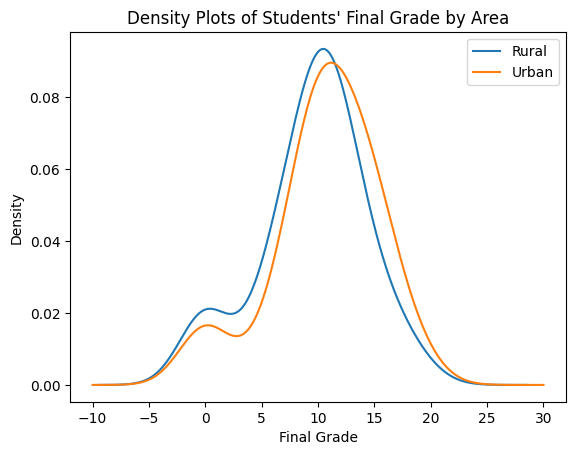

In [32]:
Rural_final.plot.density(bw_method=0.5,label="Rural")
Urban_final.plot.density(bw_method=0.5,label="Urban")
plt.xlabel("Final Grade")
plt.title("Density Plots of Students' Final Grade by Area")
plt.legend(loc=0)

Now for some boxplots! Here's the boxplot of the students' age by area.

<Axes: title={'center': 'age'}, xlabel='Area'>

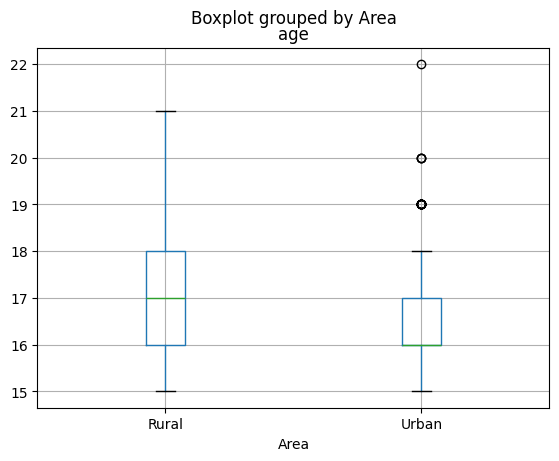

In [33]:
student_data.boxplot(column=["age"],by="Area")

<Axes: title={'center': 'G3'}, xlabel='Area'>

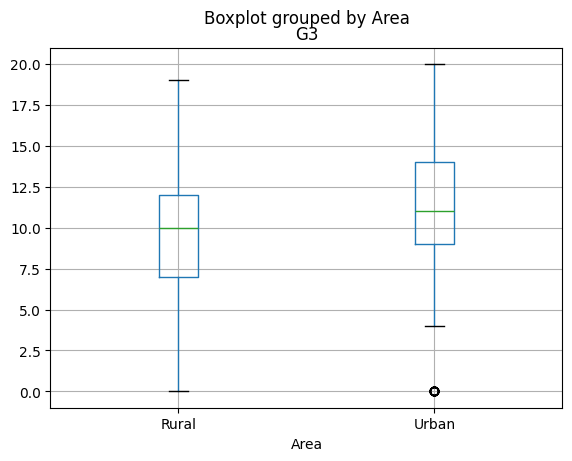

In [34]:
student_data.boxplot(column=["G3"],by="Area")

Of course, no graphical analysis is complete without a scatterplot or two.

First, let's compare age to final grade...

<Axes: title={'center': "Does a student's age determine their final grade?"}, xlabel='age', ylabel='G3'>

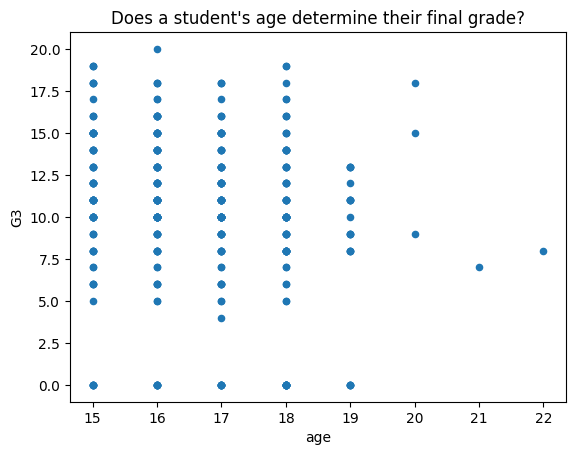

In [35]:
student_data.plot.scatter(x="age",y="G3",title="Does a student's age determine their final grade?")

How about their first period grade? Do first impressions always stick around?

<Axes: title={'center': "Does a student's initial grade determine their final grade?"}, xlabel='G1', ylabel='G3'>

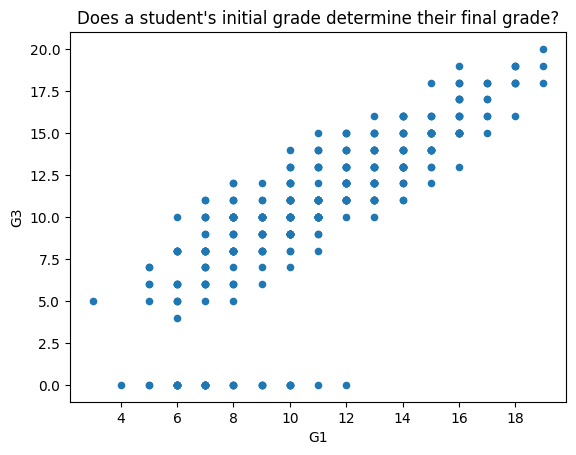

In [36]:
student_data.plot.scatter(x="G1",y="G3",title="Does a student's initial grade determine their final grade?")

## ***Plotting NFL Data***

Task 1:

Is it already time for a new data set? Sure looks like it. Let's read it in and make a handful of these variables categorical.

In [37]:
NFL_data=pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
NFL_data["Home Team"]=NFL_data.homeTeam.astype("category")
NFL_data["Away Team"]=NFL_data.awayTeam.astype("category")
NFL_data["Day"]=NFL_data.day.astype("category")
NFL_data["Location"]=NFL_data.stadium.astype("category")
NFL_data["Began At"]=NFL_data.startTime.astype("category")
NFL_data["First Toss"]=NFL_data.toss.astype("category")
NFL_data["Roof Type"]=NFL_data.roof.astype("category")
NFL_data["Surface Type"]=NFL_data.surface.astype("category")

Task 2:

The only relevant information we're interested in is the stats during the regular season, so we'll remove the data entires that did not occur during the regular season.

In [38]:
regular_NFL_data=NFL_data.loc[((NFL_data['week']!="WildCard") & (NFL_data['week']!="Division") & (NFL_data['week']!="ConfChamp") & (NFL_data['week']!="SuperBowl"))]

In [39]:
regular_NFL_data

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,HminusAScore,homeSpread,Home Team,Away Team,Day,Location,Began At,First Toss,Roof Type,Surface Type
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,-3,-4.0,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4,4.5,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,-6,6.0,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,-6,-3.0,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,8,6.0,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,17,28-Dec,Sun,2014,Chicago Bears,0,3,3,3,-1,...,4,7.0,Minnesota Vikings,Chicago Bears,Sun,TCF Bank Stadium,1:02pm,Vikings (deferred),outdoors,fieldturf
3456,17,28-Dec,Sun,2014,San Diego Chargers,0,7,0,0,-1,...,12,2.5,Kansas City Chiefs,San Diego Chargers,Sun,Arrowhead Stadium,1:03pm,Chiefs (deferred),outdoors,grass
3457,17,28-Dec,Sun,2014,Oakland Raiders,7,0,7,0,-1,...,33,14.0,Denver Broncos,Oakland Raiders,Sun,Sports Authority Field at Mile High,4:25pm,Broncos (deferred),outdoors,grass
3458,17,28-Dec,Sun,2014,Indianapolis Colts,7,10,0,10,-1,...,-17,-7.5,Tennessee Titans,Indianapolis Colts,Sun,LP Field,1:02pm,Titans,outdoors,grass


One thing I'm curious about is the margin of victory, regardless of who it favors. The only way this can be done is taking the absolute value of `HminusAScore`.

In [40]:
regular_NFL_data["Margin of Victory"]=abs(regular_NFL_data.loc[:,"HminusAScore"])
regular_NFL_data["Week"]=regular_NFL_data.week.astype(int)

/tmp/ipython-input-3899547857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_NFL_data["Margin of Victory"]=abs(regular_NFL_data.loc[:,"HminusAScore"])
/tmp/ipython-input-3899547857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_NFL_data["Week"]=regular_NFL_data.week.astype(int)


In [41]:
regular_NFL_data

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,Home Team,Away Team,Day,Location,Began At,First Toss,Roof Type,Surface Type,Margin of Victory,Week
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass,3,1
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay,4,1
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass,6,1
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf,6,1
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,17,28-Dec,Sun,2014,Chicago Bears,0,3,3,3,-1,...,Minnesota Vikings,Chicago Bears,Sun,TCF Bank Stadium,1:02pm,Vikings (deferred),outdoors,fieldturf,4,17
3456,17,28-Dec,Sun,2014,San Diego Chargers,0,7,0,0,-1,...,Kansas City Chiefs,San Diego Chargers,Sun,Arrowhead Stadium,1:03pm,Chiefs (deferred),outdoors,grass,12,17
3457,17,28-Dec,Sun,2014,Oakland Raiders,7,0,7,0,-1,...,Denver Broncos,Oakland Raiders,Sun,Sports Authority Field at Mile High,4:25pm,Broncos (deferred),outdoors,grass,33,17
3458,17,28-Dec,Sun,2014,Indianapolis Colts,7,10,0,10,-1,...,Tennessee Titans,Indianapolis Colts,Sun,LP Field,1:02pm,Titans,outdoors,grass,17,17


I just discovered the `.agg()` function and have now begun asking myself where it's been all my life. Let's apply that to get some numerical summaries for a few of these variables.

First, we'll begin with the average, minimum, and maximum margin of victory by season.

In [42]:
Winning_Margins_by_season=regular_NFL_data.groupby("season").agg(mean_Margin = ("Margin of Victory","mean"),
                                       max_Margin = ("Margin of Victory","max"),
                                       min_Margin = ("Margin of Victory","min"))
Winning_Margins_by_season

,mean_Margin,max_Margin,min_Margin
season,,,
2002,11.105469,49,0
2003,11.890625,42,1
2004,11.367188,46,1
2005,11.687500,49,1
2006,11.425781,41,1
2007,12.468750,46,1
2008,12.222656,44,0
2009,12.972656,59,1
2010,11.753906,45,1


Next, we'll find the same three measurements, but by week instead.

In [43]:
Winning_Margins_by_week=regular_NFL_data.groupby("Week").agg(mean_Margin = ("Margin of Victory","mean"),
                                       max_Margin = ("Margin of Victory","max"),
                                       min_Margin = ("Margin of Victory","min"))
Winning_Margins_by_week

,mean_Margin,max_Margin,min_Margin
Week,,,
1,11.105769,42,1
2,11.642512,45,1
3,11.404040,42,1
4,12.869565,41,1
5,11.807692,49,1
6,11.392265,59,0
7,12.094444,55,1
8,12.331461,45,1
9,11.382022,38,1


Third, the same three measurements taking both season and week number into account.

In [44]:
regular_NFL_data.groupby(["season","Week"]).agg(mean_Margin = ("Margin of Victory","mean"),
                                       max_Margin = ("Margin of Victory","max"),
                                       min_Margin = ("Margin of Victory","min"))

mean_Margin  max_Margin  min_Margin
season Week                                     
2002   1        8.875000          28           1
       2       14.625000          37           1
       3       12.000000          31           3
       4       13.785714          28           3
       5       10.357143          24           3
...                  ...         ...         ...
2014   13      14.125000          52           1
       14      13.562500          31           1
       15      11.312500          30           2
       16      10.312500          35           1
       17      13.062500          33           3

[221 rows x 3 columns]

Another variable we can consider from the original dataset are the final scores from both teams. Since the word "away" appears first alphabetically, we'll deal with the final scores for the away teams first.

As before, here are the mean, minimum, and maximum away final scores by season...

In [45]:
Away_Final_Scores_by_season=regular_NFL_data.groupby("season").agg(mean_AwayFinal = ("AFinal","mean"),
                                       max_AwayFinal = ("AFinal","max"),
                                       min_AwayFinal = ("AFinal","min"))
Away_Final_Scores_by_season

,mean_AwayFinal,max_AwayFinal,min_AwayFinal
season,,,
2002,20.550781,49,0
2003,19.054688,55,0
2004,20.230469,49,0
2005,18.792969,45,0
2006,20.234375,49,0
2007,20.253906,56,0
2008,20.750000,54,0
2009,20.363281,48,0
2010,21.089844,59,0


The final scores for the away teams by week...

In [46]:
Away_Final_Scores_by_week=regular_NFL_data.groupby("Week").agg(mean_AwayFinal = ("AFinal","mean"),
                                       max_AwayFinal = ("AFinal","max"),
                                       min_AwayFinal = ("AFinal","min"))
Away_Final_Scores_by_week

,mean_AwayFinal,max_AwayFinal,min_AwayFinal
Week,,,
1,19.716346,41,0
2,19.545894,48,0
3,20.767677,44,0
4,20.983696,55,0
5,20.527473,51,0
6,20.679558,48,0
7,21.111111,59,0
8,20.151685,45,0
9,22.146067,51,0


...and the away team final scores after taking both season and week into account.

In [47]:
regular_NFL_data.groupby(["season","Week"]).agg(mean_AwayFinal = ("AFinal","mean"),
                                       max_AwayFinal = ("AFinal","max"),
                                       min_AwayFinal = ("AFinal","min"))

mean_AwayFinal  max_AwayFinal  min_AwayFinal
season Week                                              
2002   1          23.125000             40              7
       2          22.687500             45              3
       3          19.571429             38              3
       4          18.928571             35              3
       5          24.000000             49              9
...                     ...            ...            ...
2014   13         20.687500             35              0
       14         27.062500             42             13
       15         18.000000             38              7
       16         22.875000             38              7
       17         20.812500             44              6

[221 rows x 3 columns]

We can't forget about the home teams now, right? Here are the mean, maximum, and minimum, final home team scores done by season.

In [48]:
Home_Final_Scores_by_season=regular_NFL_data.groupby("season").agg(mean_HomeFinal = ("HFinal","mean"),
                                       max_HomeFinal = ("HFinal","max"),
                                       min_HomeFinal = ("HFinal","min"))
Home_Final_Scores_by_season

,mean_HomeFinal,max_HomeFinal,min_HomeFinal
season,,,
2002,22.796875,52,0
2003,22.609375,50,0
2004,22.738281,58,0
2005,22.441406,52,0
2006,21.082031,48,0
2007,23.121094,56,3
2008,23.308594,56,0
2009,22.570312,59,0
2010,22.984375,49,0


...then by week...

In [49]:
Home_Final_Scores_by_week=regular_NFL_data.groupby("Week").agg(mean_HomeFinal = ("HFinal","mean"),
                                       max_HomeFinal = ("HFinal","max"),
                                       min_HomeFinal = ("HFinal","min"))
Home_Final_Scores_by_week

,mean_HomeFinal,max_HomeFinal,min_HomeFinal
Week,,,
1,22.139423,49,0
2,22.840580,51,0
3,22.646465,56,0
4,24.092391,56,0
5,24.324176,52,3
6,22.988950,59,3
7,23.338889,62,0
8,23.359551,52,0
9,22.258427,55,0


...and taking both season and week into account.

In [50]:
regular_NFL_data.groupby(["season","Week"]).agg(mean_HomeFinal = ("HFinal","mean"),
                                       max_HomeFinal = ("HFinal","max"),
                                       min_HomeFinal = ("HFinal","min"))

mean_HomeFinal  max_HomeFinal  min_HomeFinal
season Week                                              
2002   1          26.125000             49              6
       2          18.187500             39              0
       3          24.428571             44              3
       4          28.285714             52              7
       5          23.214286             37              6
...                     ...            ...            ...
2014   13         27.312500             52              3
       14         19.750000             43              0
       15         18.437500             41              0
       16         22.937500             42              3
       17         20.500000             47              3

[221 rows x 3 columns]

Before I forget, here's a handful of graphical summaries for these stats.

First, we'll begin with the margin of victory by season.

<Axes: xlabel='season'>

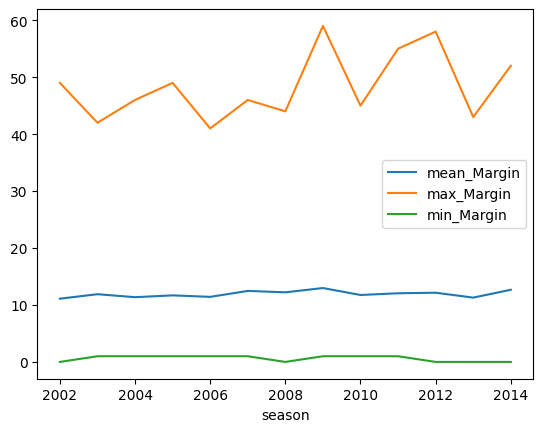

In [51]:
Winning_Margins_by_season.plot()

<Axes: xlabel='Week'>

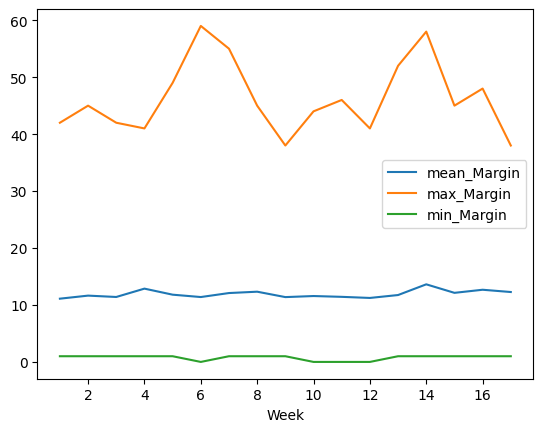

In [52]:
Winning_Margins_by_week.plot()

<Axes: xlabel='season'>

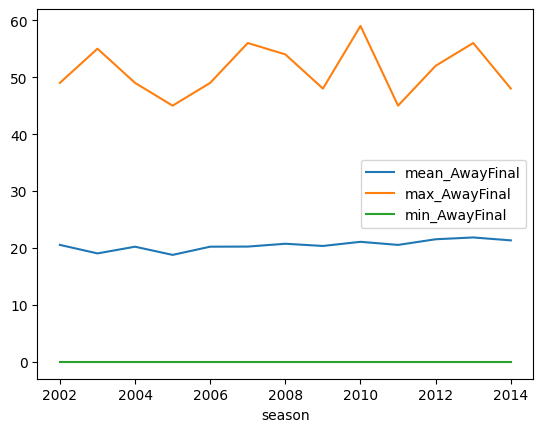

In [53]:
Away_Final_Scores_by_season.plot()

<Axes: xlabel='Week'>

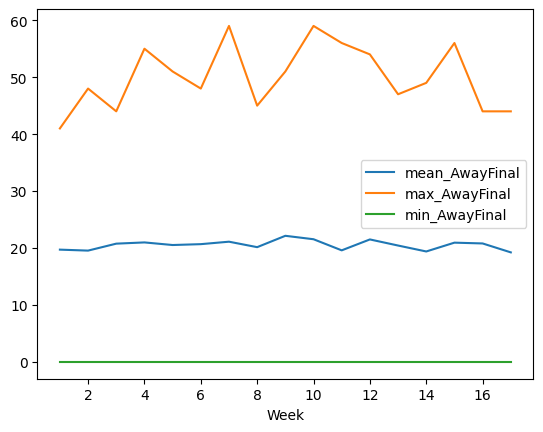

In [54]:
Away_Final_Scores_by_week.plot()

<Axes: xlabel='season'>

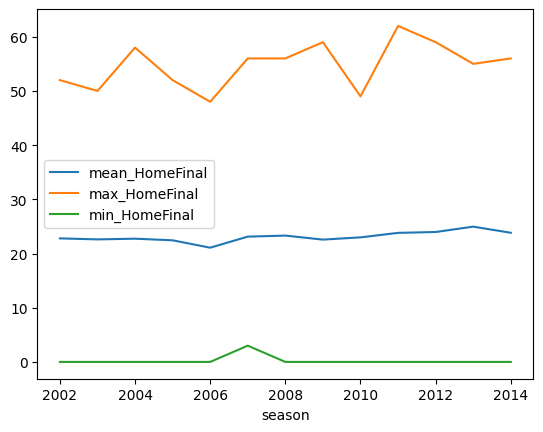

In [55]:
Home_Final_Scores_by_season.plot()

<Axes: xlabel='Week'>

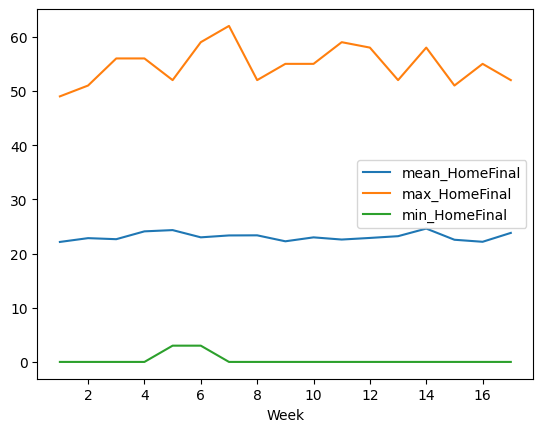

In [56]:
Home_Final_Scores_by_week.plot()

It appears that another opportunity has come to practice writing a function or two?

Let's try...writing a function that plots the average margin of victory over a particular season?

Here is some "scratch work" for developing a function to plot the margins of victory of a particular season by week:

Text(0.5, 1.0, 'Average Weekly Margin of Victories \n for the 2008 Season')

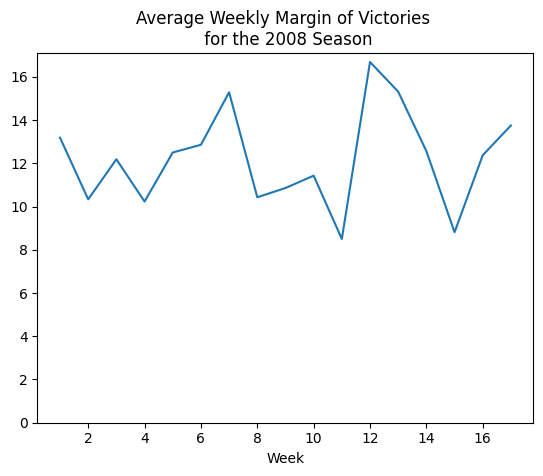

In [79]:
x=2008
mean_seasonal_margins=regular_NFL_data.loc[regular_NFL_data["season"]==x].groupby("Week")["Margin of Victory"].mean()
mean_seasonal_margins.plot()
plt.ylim(0)
plt.title(f"Average Weekly Margin of Victories \n for the {x} Season")

How long would executing such a function take, though? Attaching the `timeit` decorator can give us a good idea

In [58]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

In [57]:
def Average_Margin_Plot(season: int):
    """
    something will go here, I promise!
    """


In [71]:
list(range(2002,2015))

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]